<a href="https://colab.research.google.com/github/nkorzounUD/DSPS_NKorzoun/blob/main/HW10/ffnn_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Must change runtime to GPU!!!!!

### Do this by...
Runtime -> Change runtime type -> GPU

### Must do this before doing anything or else you will have to rerun everything.

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import pylab as pl
import numpy as np
import matplotlib.pyplot as plt



In [4]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
len(mnist.load_data())

2

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
# First value is how many training images we have
x_train.shape

(60000, 28, 28)

In [8]:
# First value is how many testing images we have
x_test.shape

(10000, 28, 28)

In [9]:
nimg, img_row, img_col = x_train.shape

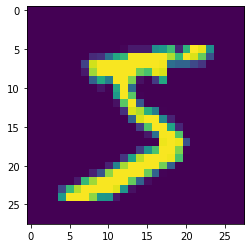

In [10]:
pl.imshow(x_train[0]);

# Figure 1:
### This is the first of 60000 training images which we will use in our model to predict a digit.

In [11]:
x_train.max()

255

In [12]:
x_train.dtype

dtype('uint8')

In [13]:
# Normalize so that image values are now from 0 to 1 instead of 0 to 255

# Same normalization for the training and test set
x_train = (x_train.astype(float) / 255)

# Normalize and reshape x_test also
x_test = (x_test.astype(float) / 255)

In [14]:
# Make sure normalization worked for training set
x_train.min(), x_train.max()

(0.0, 1.0)

In [15]:
# Make sure normalization is the same for the testing set
x_test.min(), x_test.max()

(0.0, 1.0)

In [16]:
x_train.reshape(nimg, img_row*img_col).shape

(60000, 784)

In [17]:
# Reshape training set so that it is one-dimensional for a single image
# (can now be input into our model)

x_train = x_train.reshape(nimg, img_row*img_col)
x_train.shape

(60000, 784)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
# Also reshape testing set so it is one-dimensional for a single image
x_test = x_test.reshape(x_test.shape[0], img_row*img_col)

In [20]:
# The y_train data must be a copy of our x_train data
# This is because our model is an encoder
# (encoder = transform data to a lower dimensional representation)
y_train = x_train.copy()

In [21]:
# Creates model
model_digits = Sequential()

In [22]:
# Add model layers
# Here we encode 28^2 = 784 dimensions down to 64 dimensions then de-encode

# Encoding...
#model_digits.add(Dense(256, activation="relu", input_dim=img_row*img_col))
model_digits.add(Dense(128, activation="sigmoid", input_dim=img_row*img_col))
model_digits.add(Dense(64, activation="sigmoid"))

# De-encoding... (last activation must be linear)
model_digits.add(Dense(128, activation="sigmoid"))
model_digits.add(Dense(img_row*img_col, activation="linear"))

In [23]:
# Choose optimizer and loss function
# Can change these to try getting better results for our FFNN
# From slides, best combo looks like opt=adadelta and loss=binary_crossentropy
# where activation function must be "sigmoid" instead of "relu"

model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [24]:
model_digits.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Architecture is x_train x_train instead of x_train y_train bc it's an encoder
ffnn_digit=model_digits.fit(x_train, x_train, validation_data=(x_test, x_test),
                            epochs=100, batch_size=100, verbose=1)

Epoch 1/100
600/600 [==============================] - 4s 4ms/step - loss: 0.1787 - val_loss: 0.1745
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1670 - val_loss: 0.1633
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1565 - val_loss: 0.1534
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1472 - val_loss: 0.1445
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1389 - val_loss: 0.1366
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1315 - val_loss: 0.1295
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1249 - val_loss: 0.1232
Epoch 8/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1190 - val_loss: 0.1176
Epoch 9/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1137 - val_loss: 0.1125
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1090 - val_lo

In [26]:
ffnn_digit.history

{'loss': [0.17869234085083008,
  0.1670261025428772,
  0.1565416306257248,
  0.1472087949514389,
  0.13890114426612854,
  0.13149723410606384,
  0.12488986551761627,
  0.11898647248744965,
  0.11370638757944107,
  0.10897906124591827,
  0.10474307090044022,
  0.10094472765922546,
  0.09753657132387161,
  0.09447719901800156,
  0.09172959625720978,
  0.08926112949848175,
  0.08704287558794022,
  0.08504872769117355,
  0.08325585722923279,
  0.08164356648921967,
  0.08019351214170456,
  0.07888936251401901,
  0.07771634310483932,
  0.07666095346212387,
  0.07571177929639816,
  0.07485783100128174,
  0.07408969849348068,
  0.07339874655008316,
  0.07277726382017136,
  0.07221820950508118,
  0.07171545922756195,
  0.07126329094171524,
  0.07085669040679932,
  0.07049094140529633,
  0.07016219943761826,
  0.06986649334430695,
  0.06960071623325348,
  0.06936176866292953,
  0.06914697587490082,
  0.06895390152931213,
  0.06878036260604858,
  0.06862439960241318,
  0.06848429888486862,
  0.06

In [27]:
out_loss = ffnn_digit.history['loss']
out_val_loss = ffnn_digit.history['val_loss']

In [28]:
len(out_loss), len(out_val_loss)

(100, 100)

In [29]:
epoch_num = np.linspace(1, len(out_loss), len(out_loss), endpoint=True)

In [30]:
# Make sure epoch number is defined correctly
epoch_num

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [31]:
out_loss = np.array(out_loss)
out_val_loss = np.array(out_val_loss)

In [32]:
out_loss, out_val_loss

(array([0.17869234, 0.1670261 , 0.15654163, 0.14720879, 0.13890114,
        0.13149723, 0.12488987, 0.11898647, 0.11370639, 0.10897906,
        0.10474307, 0.10094473, 0.09753657, 0.0944772 , 0.0917296 ,
        0.08926113, 0.08704288, 0.08504873, 0.08325586, 0.08164357,
        0.08019351, 0.07888936, 0.07771634, 0.07666095, 0.07571178,
        0.07485783, 0.0740897 , 0.07339875, 0.07277726, 0.07221821,
        0.07171546, 0.07126329, 0.07085669, 0.07049094, 0.0701622 ,
        0.06986649, 0.06960072, 0.06936177, 0.06914698, 0.0689539 ,
        0.06878036, 0.0686244 , 0.0684843 , 0.06835829, 0.06824514,
        0.06814341, 0.06805202, 0.06796998, 0.06789619, 0.06782994,
        0.0677704 , 0.06771698, 0.06766894, 0.06762584, 0.06758712,
        0.06755235, 0.06752107, 0.06749301, 0.06746785, 0.06744519,
        0.06742487, 0.06740662, 0.06739025, 0.06737552, 0.06736225,
        0.0673504 , 0.06733977, 0.06733021, 0.06732158, 0.06731384,
        0.06730694, 0.06730068, 0.06729511, 0.06

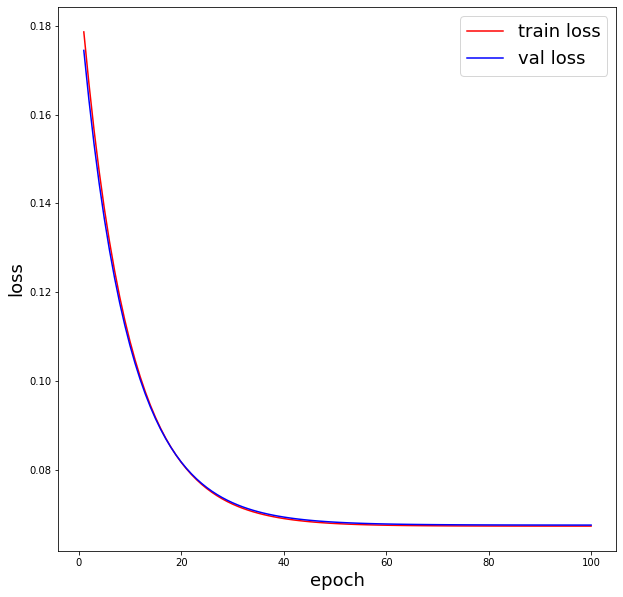

In [39]:
plt.figure(figsize=(10, 10))

plt.plot(epoch_num, out_loss, color='red', linestyle='solid',
         label='train loss')
plt.plot(epoch_num, out_val_loss, color='blue', linestyle='solid',
         label='val loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

# Figure 2:
### Plot of loss functions for training and data sets. The neural net has accomplished most of its learning by epoch 50.

# Difficult to resolve difference, let's zoom in

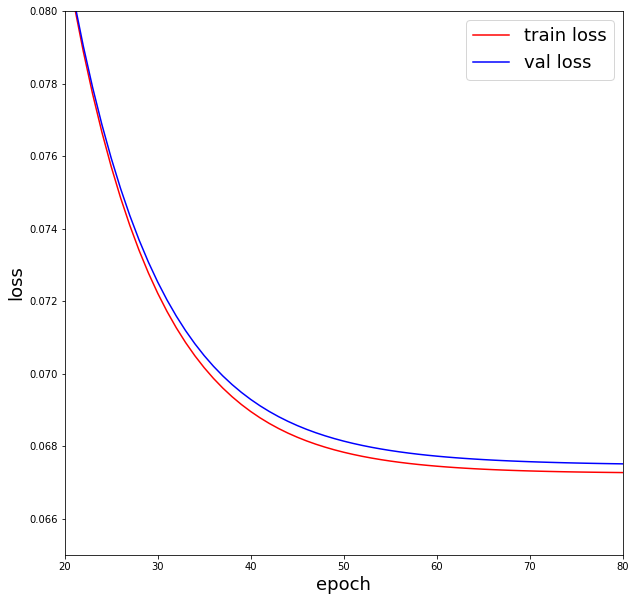

In [50]:
plt.figure(figsize=(10, 10))

plt.plot(epoch_num, out_loss, color='red', linestyle='solid',
         label='train loss')
plt.plot(epoch_num, out_val_loss, color='blue', linestyle='solid',
         label='val loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.xlim(20,80)
plt.ylim(0.065,0.08)
plt.show()

# Figure 3:
### A zoomed in plot of figure 2. The traning loss and value loss do not crossover. To avoid overfitting, we can safely cut the neural net off at 50 epochs since the loss does not change by more than a few percent beyond this point.

### Also we need to find someway to compare the input digit image with what our FFNN predicts.
